In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your final dataset
data = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Energy Consumption/Notebooks/Energy_Encoded_Scaled.csv")

# Separate features and target
X = data.drop(columns=["Consumption_Energy_Usage"], errors='ignore')
y = data["Consumption_Energy_Usage"]

# Train-test split (80–20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (800, 12), Test Shape: (200, 12)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)

# Metrics
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print("📈 Linear Regression Results:")
print(f"MAE  : {lr_mae:.3f}")
print(f"RMSE : {lr_rmse:.3f}")
print(f"R²   : {lr_r2:.3f}")


📈 Linear Regression Results:
MAE  : 0.621
RMSE : 0.794
R²   : 0.309


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf_model = RandomForestRegressor(
    n_estimators=300, 
    random_state=42,
    max_depth=None,
    min_samples_split=2
)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Metrics
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("🌲 Random Forest Results:")
print(f"MAE  : {rf_mae:.3f}")
print(f"RMSE : {rf_rmse:.3f}")
print(f"R²   : {rf_r2:.3f}")

🌲 Random Forest Results:
MAE  : 0.089
RMSE : 0.149
R²   : 0.976


In [ ]:
from sklearn.svm import SVR

# Initialize and train model
svm_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predictions
svm_preds = svm_model.predict(X_test)

# Metrics
svm_mae = mean_absolute_error(y_test, svm_preds)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_preds))
svm_r2 = r2_score(y_test, svm_preds)

print("⚡ Support Vector Regressor Results:")
print(f"MAE  : {svm_mae:.3f}")
print(f"RMSE : {svm_rmse:.3f}")
print(f"R²   : {svm_r2:.3f}")


⚡ Support Vector Regressor Results:
MAE  : 0.104
RMSE : 0.165
R²   : 0.970


In [ ]:
from xgboost import XGBRegressor

# Initialize and train model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Metrics
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

print("🚀 XGBoost Results:")
print(f"MAE  : {xgb_mae:.3f}")
print(f"RMSE : {xgb_rmse:.3f}")
print(f"R²   : {xgb_r2:.3f}")


🚀 XGBoost Results:
MAE  : 0.078
RMSE : 0.114
R²   : 0.986


📊 Model Comparison:
            Model      MAE     RMSE       R²
Linear Regression 0.621002 0.793561 0.309330
    Random Forest 0.088529 0.148887 0.975688
              SVM 0.103578 0.165139 0.970091
          XGBoost 0.078343 0.113785 0.985800


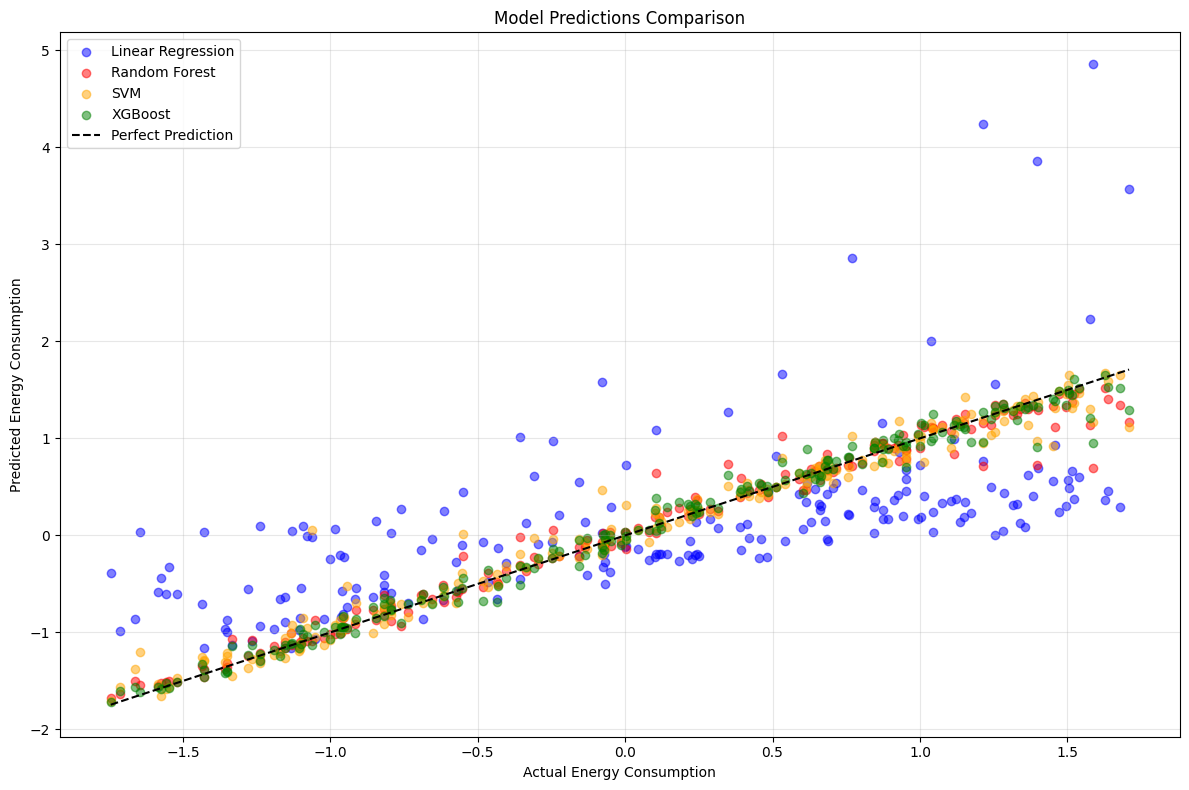

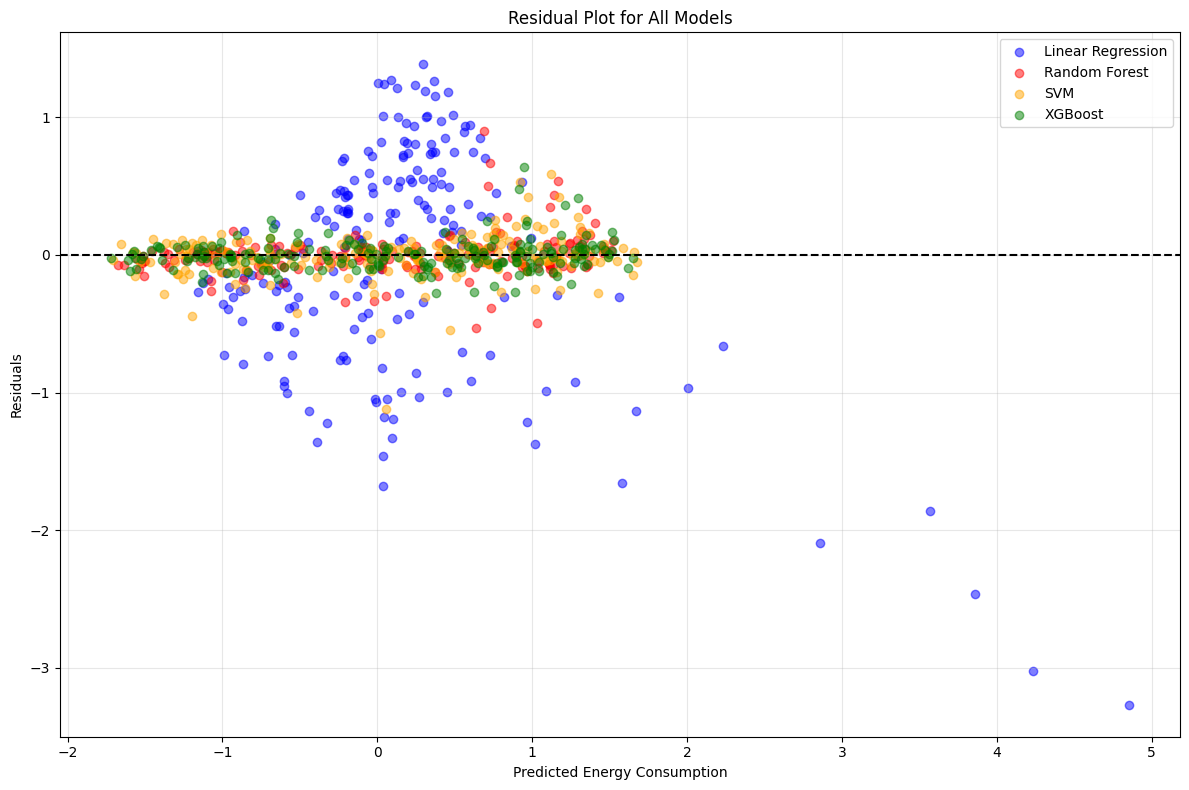


📉 Percentage Error Analysis:
            Model  Mean % Error  Median % Error  90th Percentile Error
Linear Regression    299.750497       74.383376             264.806032
    Random Forest     62.245397        7.719082              59.124992
              SVM     93.643240        9.663727              50.398253
          XGBoost     40.188751        7.659544              50.120637


C:\Users\shrey\AppData\Local\Temp\ipykernel_23844\3422011899.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(error_data, labels=labels)


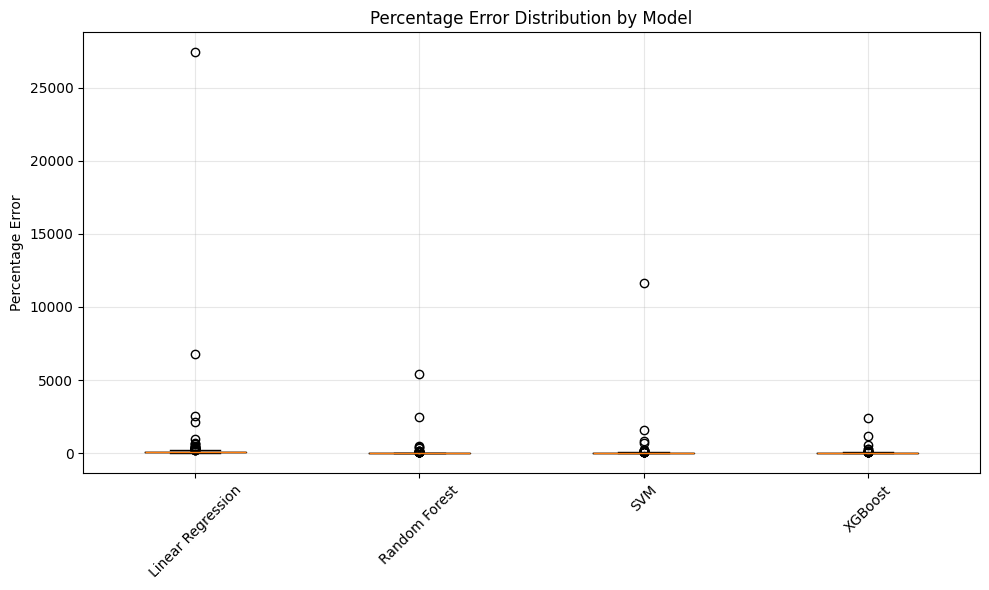

In [10]:
# Collect all models and their predictions
models = {
    'Linear Regression': {'model': lr_model, 'predictions': lr_preds, 'color': 'blue'},
    'Random Forest': {'model': rf_model, 'predictions': rf_preds, 'color': 'red'},
    'SVM': {'model': svm_model, 'predictions': svm_preds, 'color': 'orange'},
    'XGBoost': {'model': xgb_model, 'predictions': xgb_preds, 'color': 'green'}
}

# Create a DataFrame with all metrics
metrics = []
for name, model_info in models.items():
    preds = model_info['predictions']
    metrics.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
        'R²': r2_score(y_test, preds)
    })

metrics_df = pd.DataFrame(metrics)
print("📊 Model Comparison:")
print(metrics_df.to_string(index=False))

# Visualization of all models' predictions
plt.figure(figsize=(12, 8))
for name, model_info in models.items():
    plt.scatter(y_test, model_info['predictions'], 
               alpha=0.5, 
               label=name, 
               color=model_info['color'])

plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'k--', 
         label='Perfect Prediction')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Model Predictions Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(12, 8))
for name, model_info in models.items():
    residuals = y_test - model_info['predictions']
    plt.scatter(model_info['predictions'], 
               residuals, 
               alpha=0.5, 
               label=name, 
               color=model_info['color'])

plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Energy Consumption")
plt.ylabel("Residuals")
plt.title("Residual Plot for All Models")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate percentage errors
def calculate_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100

error_stats = []
for name, model_info in models.items():
    pe = calculate_percentage_error(y_test, model_info['predictions'])
    error_stats.append({
        'Model': name,
        'Mean % Error': pe.mean(),
        'Median % Error': np.median(pe),
        '90th Percentile Error': np.percentile(pe, 90)
    })

error_df = pd.DataFrame(error_stats)
print("\n📉 Percentage Error Analysis:")
print(error_df.to_string(index=False))

# Box plot of percentage errors
plt.figure(figsize=(10, 6))
error_data = []
labels = []
for name, model_info in models.items():
    pe = calculate_percentage_error(y_test, model_info['predictions'])
    error_data.append(pe)
    labels.append(name)

plt.boxplot(error_data, labels=labels)
plt.title("Percentage Error Distribution by Model")
plt.ylabel("Percentage Error")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, "rf_model.joblib")

# Save XGBoost model
joblib.dump(xgb_model, "xgb_model.joblib")

print("✅ Models saved successfully as 'rf_model.joblib' and 'xgb_model.joblib'")


✅ Models saved successfully as 'rf_model.joblib' and 'xgb_model.joblib'


In [12]:
import json

# Extract feature names from your training DataFrame
feature_names = list(X.columns)

# Save feature names to JSON
with open("feature_names.json", "w") as f:
    json.dump(feature_names, f)

print("✅ feature_names.json created successfully!")


✅ feature_names.json created successfully!
